# Overview of observational constraints on BH natal kicks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,21,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=SMALL_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


In [2]:
#  BH kick review data is in an Excel file
BH_kick_data = pd.read_excel("../BHkickReview/BH_kick_reviw.xlsx", sheet_name="Sheet1")

# Display the first few rows of the DataFrame
print(BH_kick_data.head())

          sys_name  m_bh_min  m_bh_med  m_bh_max  v_kick_min  v_kick_med  \
0         VFTS 243       8.0      10.1      12.1           0         5.0   
1          Cyg X-1      18.8      21.0      23.2           0        10.0   
2     GRO J1655-40       5.6       6.0       6.4          45        80.0   
3    XTE J1188+480       6.0       8.0      10.0          80       195.0   
4  MAXI J1305-704        7.9       8.9      10.5          79        91.0   

   v_kick_max        method  uplims  \
0          10  spectroscopy    True   
1          20           XRB    True   
2         115           XRB   False   
3         310           XRB   False   
4         114           XRB   False   

                                    citation  \
0      2022NatAs...6.1085S, arXiv:2310.01509   
1  2021Sci...371.1046M , 2012ApJ...747..111W   
2   2016A&A...587A..61C, 2005ApJ...625..324W   
3                        2009ApJ...697.1057F   
4   2021MNRAS.506..581M, 2023ApJ...952L..34K   

                   

/tmp/ipykernel_1442957/1241558960.py:71: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  plt.savefig("../Figures/BH_kick_review.pdf", bbox_inches = 'tight')
/tmp/ipykernel_1442957/1241558960.py:71: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  plt.savefig("../Figures/BH_kick_review.pdf", bbox_inches = 'tight')
/mnt/sw/nix/store/b4q5asj8flwlgmaijgj1r6wbmnls5x8k-python-3.9.15-view/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


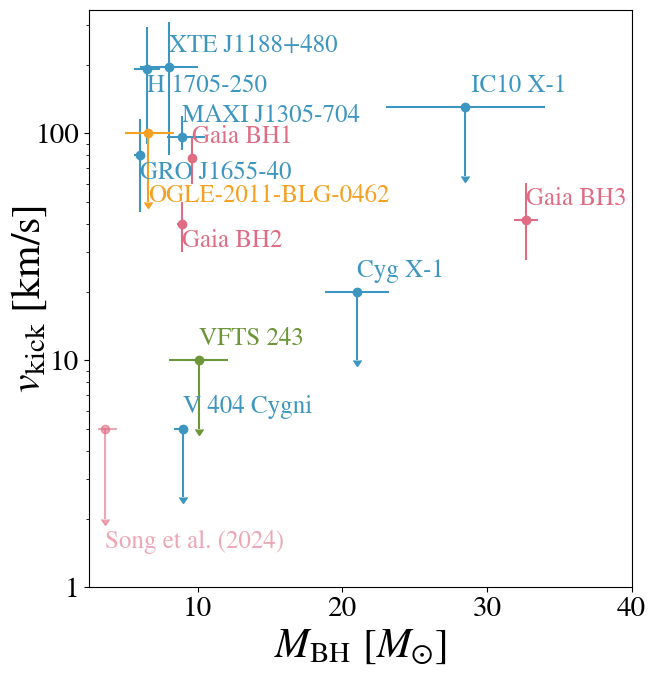

In [3]:
# color_dict = {"spectroscopy": "#2197c4",#"#2F70AF",
#     "XRB": "#2c7360",#'#A587CA',#
#     "microlensing": '#e89338',#"#386cff",
#     "astrometry": "#df6c83",#"#677d2c"
# }

color_dict = {"XRB": "#3d96c0",
    "astrometry": "#df6c83",
    "microlensing": '#f5a020',
    "spectroscopy": "#6c9638",
}

# This is necessary because the pandas tables are stupid
colors = [color_dict[method] if method in color_dict else 'black' for method in BH_kick_data['method']]

##################################################
fig, ax = plt.subplots(1, 1, figsize=(7, 7.5))

##################################################


##################################################
# Annotate each point with the system name
for i, sys_name in enumerate(BH_kick_data['sys_name']):
    VA, dy = 'bottom', 1.1 # vertial alignment for the annotation

    m_bh_err = np.array([[BH_kick_data['m_bh_med'][i] - BH_kick_data['m_bh_min'][i]], 
                         [BH_kick_data['m_bh_max'][i] - BH_kick_data['m_bh_med'][i]]])
    
    # Upper lim
    if BH_kick_data['uplims'].iloc[i]:
        v_kick_err = BH_kick_data['v_kick_max'][i]/2 #np.array([[BH_kick_data['v_kick_max'][i] - BH_kick_data['v_kick_min'][i]], [0]])
        y_value = BH_kick_data['v_kick_max'][i]
    # Data is a range
    else:
        v_kick_mid = (BH_kick_data['v_kick_min'][i] + BH_kick_data['v_kick_max'][i]) / 2

        v_kick_err = np.array([[BH_kick_data['v_kick_med'][i] - BH_kick_data['v_kick_min'][i]], 
                                         [BH_kick_data['v_kick_max'][i] - BH_kick_data['v_kick_med'][i]]])    
        y_value = v_kick_mid

    # Plot it
    plt.errorbar(BH_kick_data['m_bh_med'][i], y_value, fmt = 'o', c = colors[i],
                xerr=m_bh_err, yerr=v_kick_err, uplims = BH_kick_data['uplims'][i])
    
    HA = 'left'
    # Annotate
    if sys_name in ['GRO J1655-40', 'Gaia BH2', 'H 1705-250']:#,'OGLE-2011-BLG-0462']:
        VA, dy = 'top', 0.95
    if sys_name == 'OGLE-2011-BLG-0462':
        VA, dy, HA = 'top', 0.6, 'left'

    plt.annotate(sys_name, (BH_kick_data['m_bh_med'][i], y_value *dy),
                 va = VA, ha = HA, c = colors[i], size = 18)

# 3425577610762832384 from Song et al 2024 $3.6^{+0.8}_{-0.5}\Msun$
plt.errorbar(3.6,5, fmt = 'o', color='#df6c83', alpha = 0.6,
                 xerr=[[0.5], [0.8]], yerr = 3, uplims=True )
plt.annotate('Song et al. (2024)', (3.6, 1.5), ha = 'left', color='#df6c83', size = 18, alpha = 0.6)


# Plotvalues
plt.xlabel(r'$M_{\rm BH}$ [$M_{\odot}$]', fontsize = 30)
ax.set_ylabel(r'$v_{\rm kick}$ [km/s]', fontsize = 30, labelpad=-10)
plt.xlim(2.5, 40)
plt.ylim(1, 350)
plt.yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

plt.savefig("../Figures/BH_kick_review.pdf", bbox_inches = 'tight')
plt.show()


